In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Biblioteca para formatação do eixo X e Y
import re

In [87]:
bd_data = 'State_of_data_2022.csv'

dados = pd.read_csv(bd_data)
dados = dados.drop(dados.columns[0], axis=1) #retirando a coluna ID

In [88]:
dados.shape

(4271, 352)

In [89]:
# Função que cria data frames com base em índices de colunas
def cria_df(lista):
    return dados[dados.columns[lista[0]:lista[1]]].copy()

In [90]:
# Função que renomeia as colunas dos data frames (recebe o data frame e a lista com os novos nomes)
def renomeia_coluna_df(data_frame, lista_novos_nomes):
    lista_novos_nomes = [nome.lower() for nome in lista_novos_nomes]
    data_frame.columns = lista_novos_nomes
    return data_frame

In [91]:
# Função retira as linhas nulas
def tira_linhas_na(data_frame):
    data_frame.dropna(inplace=True)
    return data_frame


**1- Dados Demográficos**


Analisando dados / tratamento

In [92]:
df_demografico1 = cria_df([0, 16])
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1 = df_demografico1.drop(df_demografico1.columns[5], axis=1) #dropando colunas de resposta aberta
df_demografico1.columns

Index(['('P1_a ', 'Idade')', '('P1_a_1 ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_c ', 'Cor/raca/etnia')',
       '('P1_d ', 'PCD')', '('P1_g ', 'vive_no_brasil')',
       '('P1_i ', 'Estado onde mora')', '('P1_i_1 ', 'uf onde mora')',
       '('P1_i_2 ', 'Regiao onde mora')', '('P1_j ', 'Mudou de Estado?')',
       '('P1_k ', 'Regiao de origem')', '('P1_l ', 'Nivel de Ensino')',
       '('P1_m ', 'Área de Formação')',
       '('P2_a ', 'Qual sua situação atual de trabalho?')'],
      dtype='object')

In [93]:
novos_nomes1 = ['Idade','Faixa_idade','Genero','Cor_raca_etnia','PCD','vive_no_brasil','Estado_onde_mora','uf_onde_mora','Regiao_onde_mora','Mudou_de_Estado?','Regiao_de_origem','Nivel_de_Ensino','Área_de_Formação','Qual_sua_situação_atual_de_trabalho?']

renomeia_coluna_df(df_demografico1,novos_nomes1)
df_demografico1.head()

,idade,faixa_idade,genero,cor_raca_etnia,pcd,vive_no_brasil,estado_onde_mora,uf_onde_mora,regiao_onde_mora,mudou_de_estado?,regiao_de_origem,nivel_de_ensino,área_de_formação,qual_sua_situação_atual_de_trabalho?
0,39.0,35-39,Masculino,Parda,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público
1,32.0,30-34,Masculino,Parda,Não,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT)
2,53.0,50-54,Masculino,Branca,Não,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,27.0,25-29,Masculino,Branca,Não,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT)
4,46.0,45-49,Feminino,Branca,Não,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público


In [94]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   idade                                 4197 non-null   float64
 1   faixa_idade                           4271 non-null   object 
 2   genero                                4262 non-null   object 
 3   cor_raca_etnia                        4271 non-null   object 
 4   pcd                                   4271 non-null   object 
 5   vive_no_brasil                        4271 non-null   bool   
 6   estado_onde_mora                      4156 non-null   object 
 7   uf_onde_mora                          4156 non-null   object 
 8   regiao_onde_mora                      4171 non-null   object 
 9   mudou_de_estado?                      4171 non-null   object 
 10  regiao_de_origem                      772 non-null    object 
 11  nivel_de_ensino  

In [95]:
df_demografico1.shape

(4271, 14)

In [96]:
df_demografico1.isnull().sum()

idade                                     74
faixa_idade                                0
genero                                     9
cor_raca_etnia                             0
pcd                                        0
vive_no_brasil                             0
estado_onde_mora                         115
uf_onde_mora                             115
regiao_onde_mora                         100
mudou_de_estado?                         100
regiao_de_origem                        3499
nivel_de_ensino                            0
área_de_formação                         122
qual_sua_situação_atual_de_trabalho?       0
dtype: int64

In [97]:
df_demografico1.describe()

,idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


In [98]:
#df_demografico1.dropna(subset=["genero"],inplace=True)

In [99]:
df_demografico1["genero"].unique()

array(['Masculino', 'Feminino', nan, 'Prefiro não informar'], dtype=object)

In [100]:
df_demografico1.loc[df_demografico1["genero"].isnull()] = "Prefiro não informar"

In [101]:
df_demografico1["idade"].unique()

array([39.0, 32.0, 53.0, 27.0, 46.0, 21.0, 31.0, 33.0, nan, 25.0, 24.0,
       35.0, 28.0, 29.0, 26.0, 37.0, 34.0, 40.0, 18.0, 30.0, 38.0, 48.0,
       43.0, 44.0, 50.0, 22.0, 36.0, 51.0, 20.0, 23.0, 42.0, 47.0, 41.0,
       45.0, 'Prefiro não informar', 54.0, 49.0, 52.0, 19.0], dtype=object)

In [102]:
media_nao_inf1 = df_demografico1.loc[(df_demografico1["genero"] == "Prefiro não informar") & (df_demografico1["idade"] != "Prefiro não informar"),"idade"].mean()

In [103]:
media_masc1 = df_demografico1.loc[df_demografico1["genero"] == "Masculino", "idade"].mean()

In [104]:
media_fem1 = df_demografico1.loc[df_demografico1["genero"] == "Feminino", "idade"].mean()

In [105]:
#df_demografico1[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"),"idade"] = media_fem1 - precisa do .loc
# Substitua as idades nulas das mulheres pela média calculada
df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Feminino"), "idade"] = int(media_fem1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Masculino"), "idade"] = int(media_masc1)

df_demografico1.loc[(df_demografico1["idade"].isnull()) & (df_demografico1["genero"] == "Prefiro não informar"), "idade"] = int(media_nao_inf1)

In [106]:
indices_remover1 = df_demografico1[df_demografico1["idade"] == "Prefiro não informar"].index
df_demografico1.drop(indices_remover1,inplace=True)

In [107]:
df_demografico1["idade"] = df_demografico1["idade"].astype(int)


In [108]:
df_demografico1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4262 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   idade                                 4262 non-null   int32 
 1   faixa_idade                           4262 non-null   object
 2   genero                                4262 non-null   object
 3   cor_raca_etnia                        4262 non-null   object
 4   pcd                                   4262 non-null   object
 5   vive_no_brasil                        4262 non-null   object
 6   estado_onde_mora                      4147 non-null   object
 7   uf_onde_mora                          4147 non-null   object
 8   regiao_onde_mora                      4162 non-null   object
 9   mudou_de_estado?                      4162 non-null   object
 10  regiao_de_origem                      770 non-null    object
 11  nivel_de_ensino                    

Nivel de ensino x Situação de Trabalho


In [109]:
df_demografico1["qual_sua_situação_atual_de_trabalho?"].unique()

array(['Servidor Público', 'Empregado (CLT)',
       'Trabalho na área Acadêmica/Pesquisador',
       'Empreendedor ou Empregado (CNPJ)',
       'Desempregado, buscando recolocação', 'Estagiário',
       'Prefiro não informar', 'Somente Estudante (pós-graduação)',
       'Freelancer', 'Desempregado e não estou buscando recolocação',
       'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
       'Somente Estudante (graduação)',
       'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil'],
      dtype=object)

In [110]:
df_demografico1["nivel_de_ensino"].unique()

array(['Pós-graduação', 'Graduação/Bacharelado', 'Doutorado ou Phd',
       'Estudante de Graduação', 'Mestrado', 'Não tenho graduação formal',
       'Prefiro não informar'], dtype=object)

In [111]:
df_demografico11 = df_demografico1.copy()


In [112]:
#Agrupando formação
agrupar_graduacao1 = ["Pós-graduação", "Graduação/Bacharelado", "Doutorado ou Phd", "Mestrado"]
df_demografico11["nivel_de_ensino"].replace(agrupar_graduacao1, "Ensino superior Completo", inplace=True)

df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Estudante de Graduação"), "nivel_de_ensino"] = "Estudante"

df_demografico11['nivel_de_ensino'].unique()

array(['Ensino superior Completo', 'Estudante',
       'Não tenho graduação formal', 'Prefiro não informar'], dtype=object)

In [113]:
#Agrupando situação de trabalho
agrupar_trabalho1A = ["Empreendedor ou Empregado (CNPJ)", "Freelancer"]
agrupar_trabalho1B = ["Servidor Público","Empregado (CLT)"]
agrupar_trabalho1C = ["Desempregado, buscando recolocação","Desempregado e não estou buscando recolocação"]
agrupar_trabalho1D = ["Somente Estudante (pós-graduação)","Somente Estudante (graduação)","Trabalho na área Acadêmica/Pesquisador"]
agrupar_trabalho1E = ["Vivo fora do Brasil e trabalho para empresa de fora do Brasil","Vivo no Brasil e trabalho remoto para empresa de fora do Brasil"]

df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1A, "PJ", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1B, "CLT e Estatutário", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1C, "Desempregado", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1D, "Estudante e Pesquisador", inplace=True)
df_demografico11["qual_sua_situação_atual_de_trabalho?"].replace(agrupar_trabalho1E, "Trabalho fora do Brasil", inplace=True)

df_demografico11['qual_sua_situação_atual_de_trabalho?'].unique()

array(['CLT e Estatutário', 'Estudante e Pesquisador', 'PJ',
       'Desempregado', 'Estagiário', 'Prefiro não informar',
       'Trabalho fora do Brasil'], dtype=object)

In [114]:
pivot_table1 = pd.pivot_table(df_demografico11, 
                             index='qual_sua_situação_atual_de_trabalho?', 
                             columns='nivel_de_ensino', 
                             aggfunc='size', 
                             fill_value=0)
# 'aggfunc' é a função de agregação para contar as ocorrências (size),
# fill_value preenche os valores ausentes com 0.

pivot_table1

nivel_de_ensino,Ensino superior Completo,Estudante,Não tenho graduação formal,Prefiro não informar
qual_sua_situação_atual_de_trabalho?,,,,
CLT e Estatutário,2575,282,53,4
Desempregado,267,77,18,2
Estagiário,44,140,2,0
Estudante e Pesquisador,136,66,8,1
PJ,382,42,22,2
Prefiro não informar,16,3,2,3
Trabalho fora do Brasil,109,1,5,0


In [115]:
#tratando o nivel de ensino "não tenho graduação formal"
df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Não tenho graduação formal") & (df_demografico11["qual_sua_situação_atual_de_trabalho?"] == "Estagiário"), "nivel_de_ensino"] = "Estudante"

In [116]:
df_demografico11.loc[(df_demografico11["nivel_de_ensino"] == "Não tenho graduação formal") & (df_demografico11["qual_sua_situação_atual_de_trabalho?"] == "Estudante e Pesquisador"), "nivel_de_ensino"] = "Estudante"


Area de formação x Genero

In [117]:
df_demografico1['área_de_formação'].unique()

array(['Computação / Engenharia de Software / Sistemas de Informação/ TI',
       'Outras Engenharias',
       'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais',
       'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde',
       'Ciências Sociais',
       'Economia/ Administração / Contabilidade / Finanças/ Negócios',
       'Marketing / Publicidade / Comunicação / Jornalismo', nan,
       'Química / Física', 'Outra opção'], dtype=object)

In [118]:
df_demografico1['área_de_formação'].isnull().sum()

122

In [119]:
df_demografico1.loc[df_demografico1["área_de_formação"].isnull(), "área_de_formação"] = "Prefiro não informar"

In [120]:
pivot_table11 = pd.pivot_table(df_demografico1, 
                             index='genero', 
                             columns='área_de_formação', 
                             aggfunc='size', 
                             fill_value=0)
pivot_table11

área_de_formação,Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde,Ciências Sociais,Computação / Engenharia de Software / Sistemas de Informação/ TI,Economia/ Administração / Contabilidade / Finanças/ Negócios,Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais,Marketing / Publicidade / Comunicação / Jornalismo,Outra opção,Outras Engenharias,Prefiro não informar,Química / Física
genero,,,,,,,,,,
Feminino,53,22,287,174,138,55,85,187,27,28
Masculino,57,49,1252,464,266,66,114,749,94,83
Prefiro não informar,1,0,2,2,1,1,0,3,1,1


Gráficos - Dados Demograficos

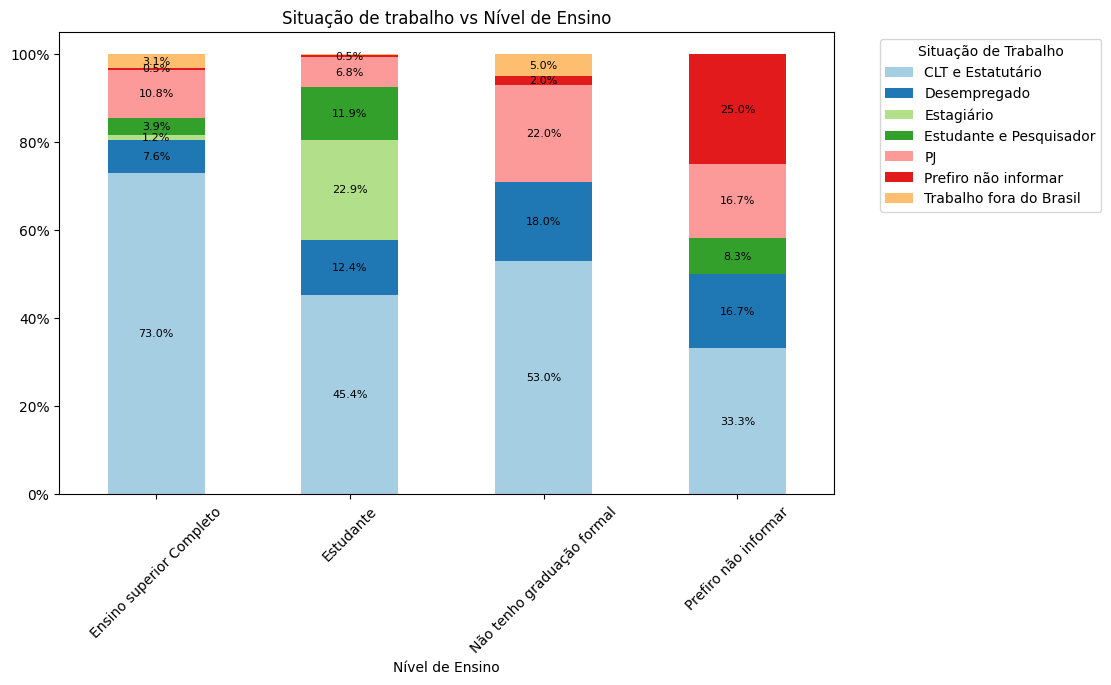

In [121]:
# Tabela de contagem cruzada das duas colunas
cross_tab1 = pd.crosstab(df_demografico11['nivel_de_ensino'],
                        df_demografico11['qual_sua_situação_atual_de_trabalho?'], 
                        normalize='index')  # Normaliza para obter porcentagens em relação às linhas

# Paleta de cores
palette1 = sns.color_palette("Paired")

# Gráfico de barras 100% empilhadas - precisa do stacked=True, se nao ele coloca uma barra ao lado da outra (False/Padrão)
ax = cross_tab1.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette1)

# Rótulos aos eixos e Título
plt.xlabel('Nível de Ensino')
plt.title('Situação de trabalho vs Nível de Ensino')

# Legenda fora da área do gráfico - bbox_to_anchor=(1.05, 1) define a posição
plt.legend(title='Situação de Trabalho', bbox_to_anchor=(1.05, 1), loc='upper left')

# Para exibir valores Y em porcentagem
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 representa 100%

# Rotacionar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Colocar % no centro das nas barras e não mostrar porcentagens menores que 0,4%
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0.004:
        ax.annotate(f'{height*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8)


plt.show()


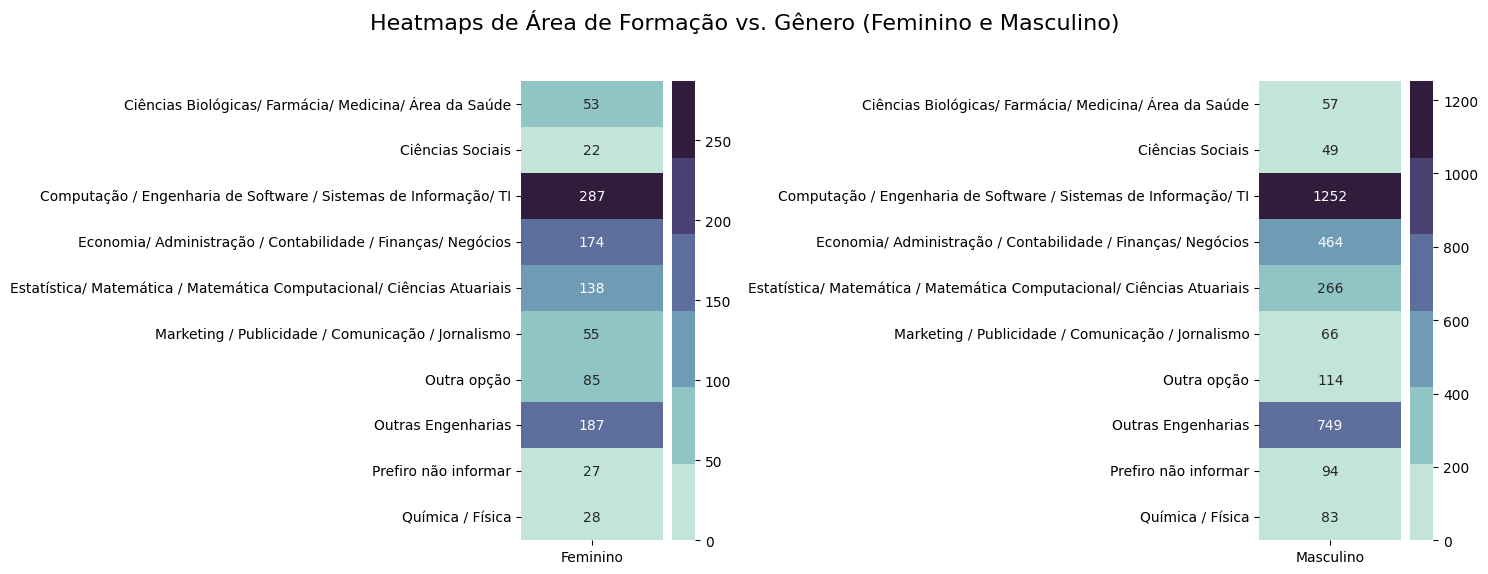

In [122]:
# Filtrar o DataFrame para considerar apenas o gênero "Feminino" e "Masculino"
df_feminino1 = df_demografico1[df_demografico1['genero'] == 'Feminino']
df_masculino2 = df_demografico1[df_demografico1['genero'] == 'Masculino']

# Criar tabela de contagem cruzada
heatmap_data_feminino1 = pd.crosstab(df_feminino1['área_de_formação'], df_feminino1['genero'])
heatmap_data_masculino1 = pd.crosstab(df_masculino2['área_de_formação'], df_masculino2['genero'])

# Paleta de cores para cubehelix_palette
palette11 = sns.cubehelix_palette(start=.5, rot=-.5)

# Definir os valores mínimos e máximos separados para as escalas de cores
vmin_feminino1 = 0
vmax_feminino1 = heatmap_data_feminino1.values.max()

vmin_masculino1 = 0
vmax_masculino1 = heatmap_data_masculino1.values.max()

# Criar uma unica figura com dois subplots - (1,2) lado a lado / (2,1) um em cima do outro
fig, axes = plt.subplots(1, 2, figsize=(15, 6), )

# Ajustar o espaçamento entre os subplots
fig.subplots_adjust(wspace=5)

# Criar os heatmaps em cada subplot com escalas de cores separadas
sns.heatmap(heatmap_data_feminino1, annot=True, cmap=palette11, fmt='d', vmin=vmin_feminino1, vmax=vmax_feminino1, ax=axes[0])
sns.heatmap(heatmap_data_masculino1, annot=True, cmap=palette11, fmt='d', vmin=vmin_masculino1, vmax=vmax_masculino1, ax=axes[1])

# Adicionar um título para ambos os heatmaps
fig.suptitle('Heatmaps de Área de Formação vs. Gênero (Feminino e Masculino)', fontsize=16)

# Rótulos aos eixos
axes[0].set_xlabel('')  # Vazio remove o rótulo do eixo
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Ajustar o layout para evitar sobreposição de rótulos, centralizar titulo e alinhar legendas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


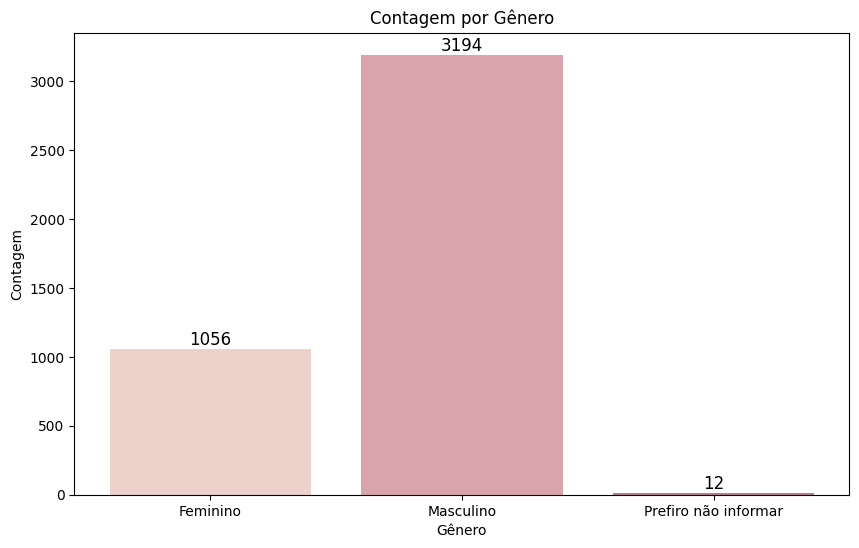

In [123]:
#Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero = df_demografico1.groupby("genero")["idade"].count()

#Configurar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(grupo_genero.index, grupo_genero.values, color=sns.cubehelix_palette())

# Adicionar os números absolutos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=12, color='black')

# Adicionar rótulos e título
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Contagem por Gênero")

plt.show()

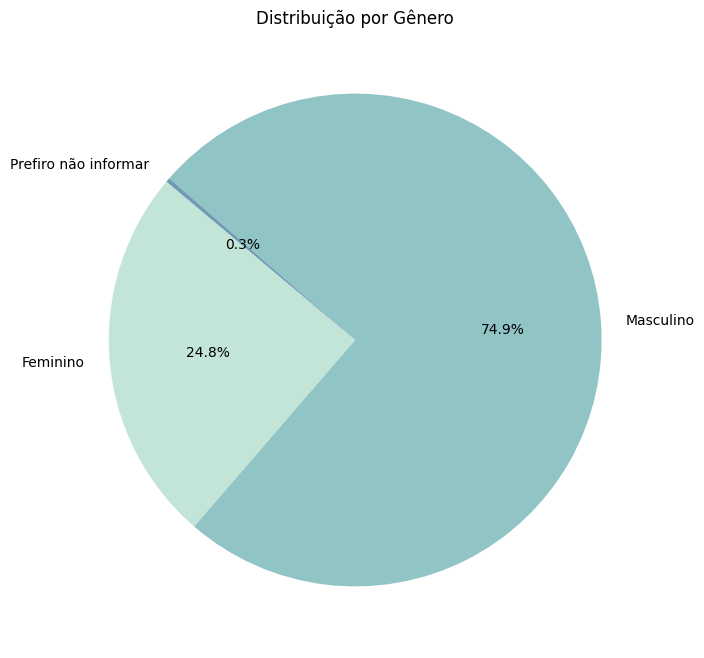

In [124]:
# Calcular a contagem de cada categoria na coluna 'genero'
grupo_genero1 = df_demografico1.groupby("genero")["idade"].count()

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(grupo_genero1, labels=grupo_genero1.index, autopct='%1.1f%%', startangle=140, colors=sns.cubehelix_palette(start=.5, rot=-.5)
)

# Adicionar título
plt.title("Distribuição por Gênero")

# Adicionar os números absolutos nas bordas das fatias
for i, (wedge, label) in enumerate(zip(wedges, grupo_genero1.index)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 0.5 * wedge.r * np.cos(np.deg2rad(angle))
    y = 0.5 * wedge.r * np.sin(np.deg2rad(angle))
    #plt.text(x, y, f"{grupo_genero1[label]}", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

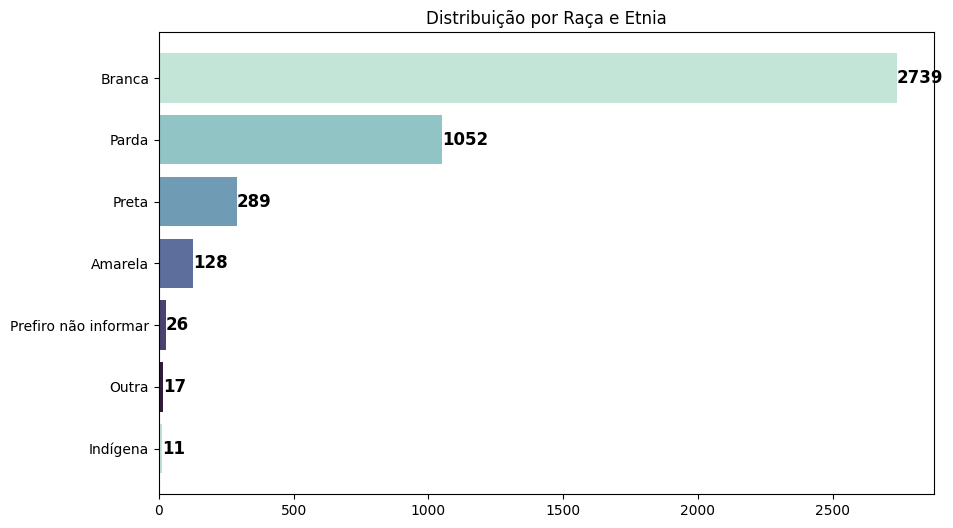

In [125]:
# Calcular a contagem de cada categoria na coluna 'cor_raca_etnia'
contagem_cor_raca1 = df_demografico1["cor_raca_etnia"].value_counts()

# Configurar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_cor_raca1.index, contagem_cor_raca1.values, color=sns.cubehelix_palette(start=.5, rot=-.5))

# Adicionar os valores acima das barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center', color='black', fontsize=12, fontweight='bold')

# Adicionar rótulos e título
plt.xlabel("")
plt.ylabel("")
plt.title("Distribuição por Raça e Etnia")

# Inverter a ordem das categorias para ficar em ordem decrescente
plt.gca().invert_yaxis()

plt.show()

**2- Carreiras**


In [127]:
# Trabalhando com as colunas da Parte 2

parte2_columns = dados.columns[dados.columns.str.startswith("('P2")] # Selecionar as colunas que começam com P2
qtd_parte2_columns = len(parte2_columns) # Quantidade de colunas da parte 2
indices_colunas_parte_2 = [dados.columns.get_loc(col) for col in parte2_columns] # Obter os índices das colunas da Parte 2

# Criar um novo DataFrame com as colunas da Parte 2
data_parte_2 = dados.iloc[:, indices_colunas_parte_2]

# Dicionário para mapear colunas para perguntas
coluna_para_pergunta = {}

# Preencher o dicionário com os nomes das perguntas
for col in parte2_columns:
    match = re.search(r"', '(.*?)'\)", col)
    if match:
        pergunta = match.group(1)
        coluna_para_pergunta[col] = pergunta

# Imprimir o dicionário de mapeamento
 #for col, pergunta in coluna_para_pergunta.items():
 #    print(f"Coluna: {col}, Pergunta: {pergunta}")

# Criar uma lista com todas as perguntas da Parte 2
todas_perguntas_parte_2 = list(coluna_para_pergunta.values())
#print(todas_perguntas_parte_2)

# Imprimir a lista de perguntas
 #for idx, pergunta in enumerate(todas_perguntas_parte_2, start=1):
 #   print(f"Pergunta {idx}: {pergunta}")


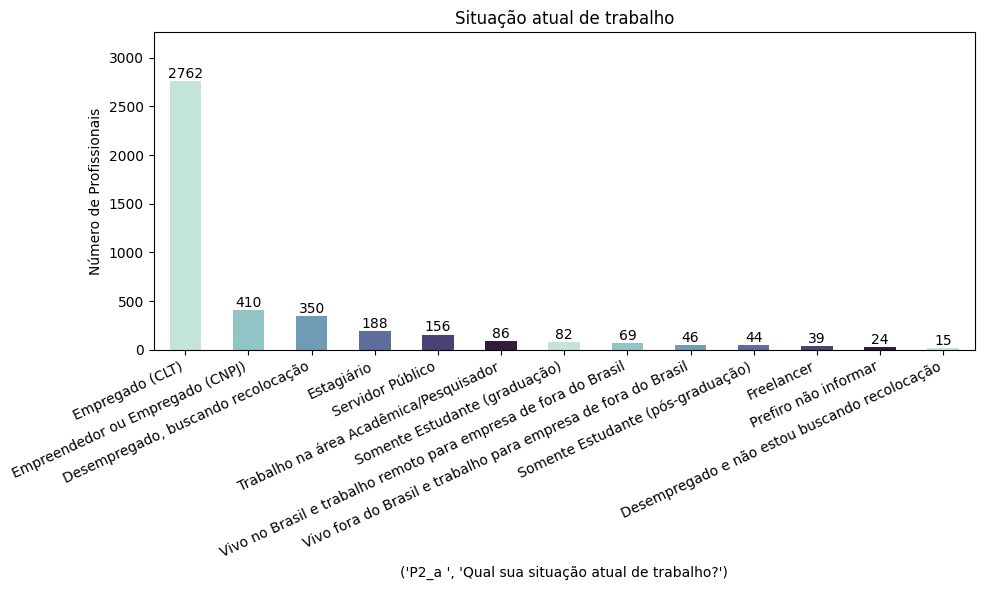

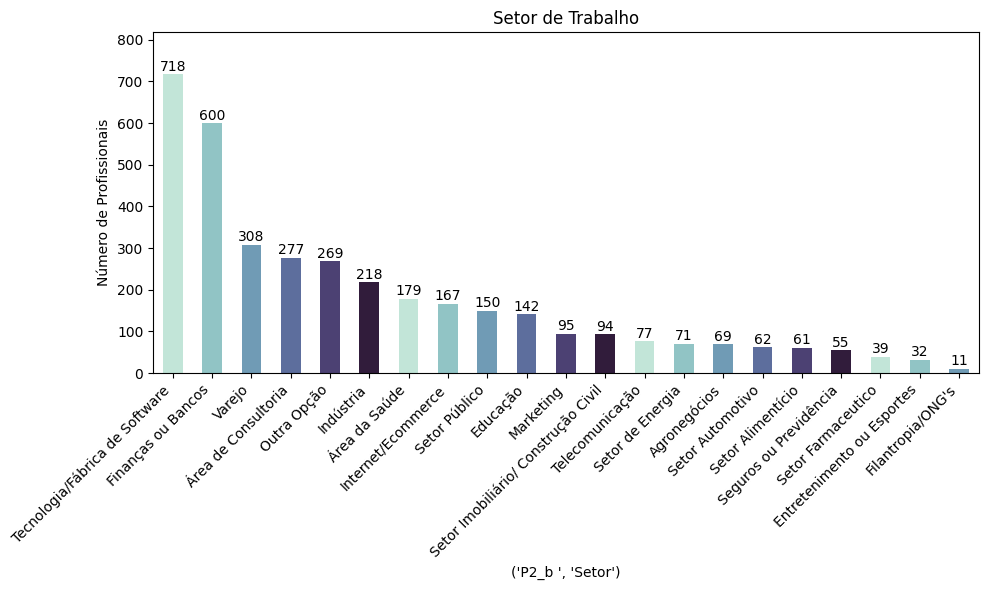

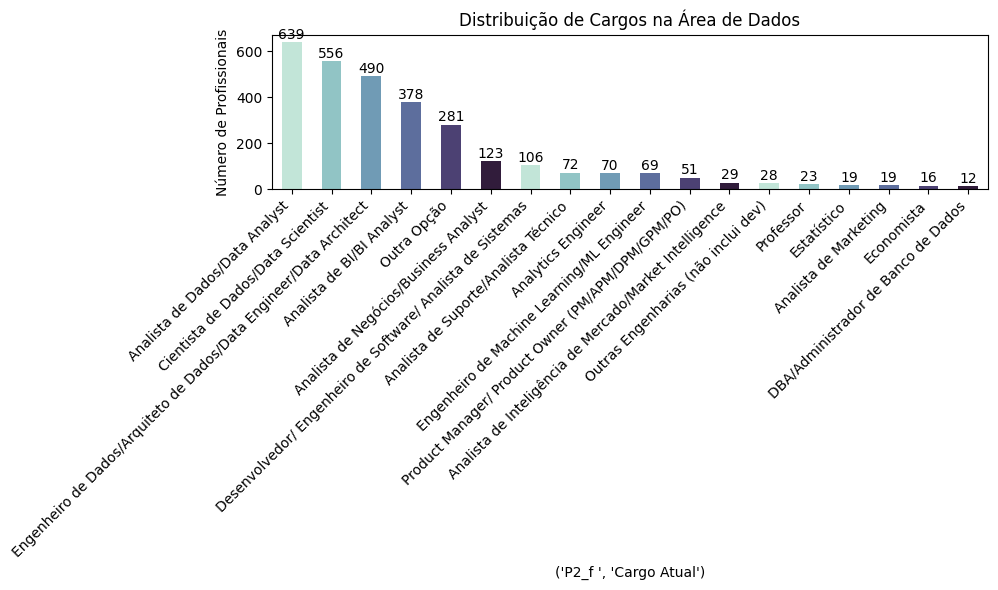

In [135]:
# Situação de Trabalho
contagem_cargos = data_parte_2["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Situação atual de trabalho')

plt.ylabel('Número de Profissionais')
plt.xticks(rotation=25, ha="right")  # Ajusta o ângulo e o alinhamento dos rótulos
ax.set_xticklabels(contagem_cargos.index)  # Define os rótulos manualmente

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos) + 500)  # Aumenta a borda superior

plt.tight_layout()
plt.show()


# Setores
contagem_cargos = data_parte_2["('P2_b ', 'Setor')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Setor de Trabalho')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_cargos.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos) + 100)  # Aumenta a borda superior

plt.tight_layout()
plt.show()



# Distribuição de cargos
contagem_cargos = data_parte_2["('P2_f ', 'Cargo Atual')"].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos.plot(kind='bar', color=sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Distribuição de Cargos na Área de Dados')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


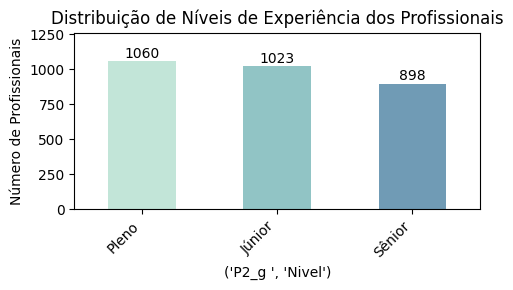

In [136]:
# Distribuição de níveis de experiência
contagem_niveis = data_parte_2["('P2_g ', 'Nivel')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(5, 3))
ax = contagem_niveis.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Distribuição de Níveis de Experiência dos Profissionais')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_niveis.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_niveis):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_niveis) + 200)  # Aumenta a borda superior

plt.tight_layout()
plt.show()

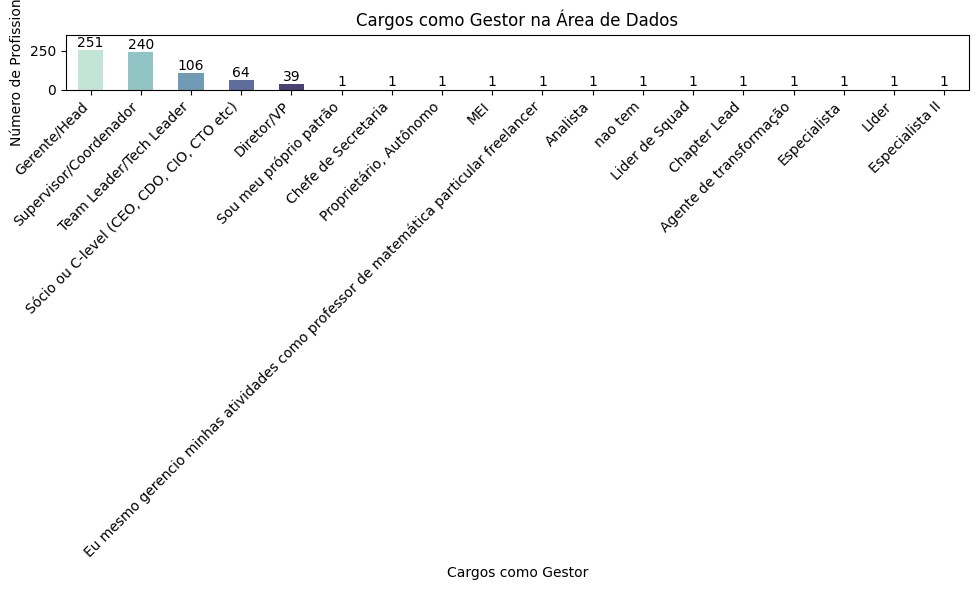

In [137]:
# Contagem dos cargos relacionados a posições de gestão
contagem_cargos_gestao = data_parte_2["('P2_e ', 'Cargo como Gestor')"].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
ax = contagem_cargos_gestao.plot(kind='bar', color = sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Cargos como Gestor na Área de Dados')
plt.xlabel('Cargos como Gestor')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(contagem_cargos_gestao.index)

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos_gestao):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos_gestao) + 100)  # Aumenta a borda superior

plt.tight_layout()
plt.show()

**2- Área de Dados / Ciencia de Dados**
